In [1]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Wczytanie danych


In [2]:
fires_df = pd.read_csv('forest_fires_dataset.csv')


## Odruch bezwarunkowy
Wyświetlenie początkowych wierszy 

In [3]:
fires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


## Dla lepszego zrozumienia danych wyświetlmy opisy kolumn 

In [4]:
fires_column_descryption=pd.read_csv('attributes_forest_fires.csv')
pd.options.display.max_colwidth =0 # aby nie ucinało opisów 
fires_column_descryption

,name,type,description
0,X,integer,x-axis spatial coordinate within the Montesinho park map: 1 to 9
1,Y,integer,y-axis spatial coordinate within the Montesinho park map: 2 to 9
2,month,string,month of the year: 'jan' to 'dec'
3,day,string,day of the week: 'mon' to 'sun'
4,FFMC,float,FFMC index from the FWI system: 18.7 to 96.20
5,DMC,float,DMC index from the FWI system: 1.1 to 291.3
6,DC,float,DC index from the FWI system: 7.9 to 860.6
7,ISI,float,ISI index from the FWI system: 0.0 to 56.10
8,temp,float,temperature in Celsius degrees: 2.2 to 33.30
9,RH,float,relative humidity in %: 15.0 to 100


## Wyjaśnienie skrótów z systemu FWI (Fire Weather Index)

####  FFMC:
The Fine Fuel Moisture Code (FFMC) represents fuel moisture of forest litter fuels under the shade of a forest canopy. It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. It ranges from 0-101. Subtracting the FFMC value from 100 can provide an estimate for the equivalent (approximately 10h) fuel moisture content, most accurate when FFMC values are roughly above 80.

#### DMC:
The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended. It may provide insight to live fuel moisture stress.

#### CD:
The Drought Code (DC), much like the Keetch-Byrum Drought Index, represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels. It is unitless, with a maximum value of 1000. Extreme drought conditions have produced DC values near 800.

#### ISI:
The Initial Spread Index (ISI) is analogous to the NFDRS Spread Component (SC). It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential. ISI is a key input for fire behavior predictions in the FBP system. It is unitless and open ended.


In [5]:
fires_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


Tabela zawiera 517 wierszy, bez braków (nie ma żadnych null-i). Prócz dwóch kolumn (miesiąc i dzień tygodnia) dane są numeryczne 


In [6]:
fires_df.month.value_counts()

aug    184
sep    172
mar    54 
jul    32 
feb    20 
jun    17 
oct    15 
apr    9  
dec    9  
may    2  
jan    2  
nov    1  
Name: month, dtype: int64

Większość obserwacji pochodzi z miesięcy sierpnia i września. Wydaje się ze w tych właśnie miesiącach występuje największe zagrożenie pożarowe, więc wtedy występuje nasilony monitoring 

In [7]:
fires_df.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Zamieńmy miesiące i dni na zmienne numeryczne tak i dla nich generowały się wykresy

In [8]:
import copy
fires_all_numeric=copy.deepcopy(fires_df)
month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,'oct':10, 'nov':11,'dec':12}
day = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}
fires_all_numeric.month=fires_df.month.map(month)
fires_all_numeric.day=fires_df.day.map(day)


Podstawowe podsumowanie liczbowych kolumn w ramce:

In [9]:
fires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


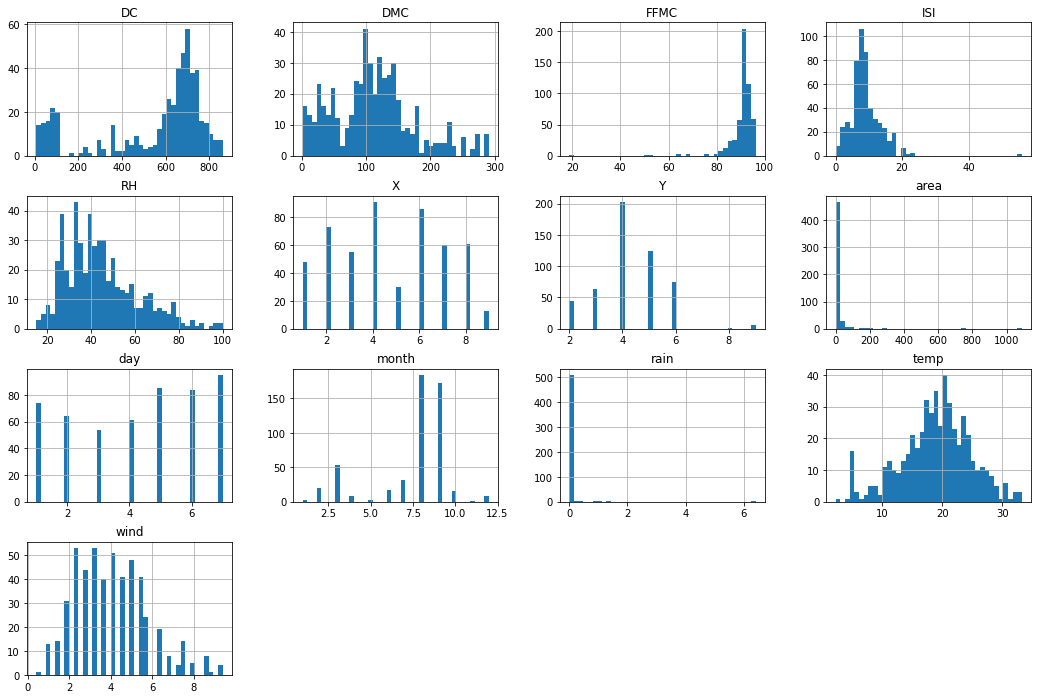

In [10]:
fires_all_numeric.hist(bins = 40, figsize=(18, 12))
plt.show()

area i rain zawiera sporo zer, sprawdźmy ile dokładnie


In [11]:
fires_df.area.value_counts()

0.00     247
1.94     3  
3.71     2  
0.90     2  
1.95     2  
        ..  
1.26     1  
2.44     1  
2.03     1  
2.21     1  
24.24    1  
Name: area, Length: 251, dtype: int64

In [12]:
fires_df.rain.value_counts()

0.0    509
0.8    2  
0.2    2  
0.4    1  
6.4    1  
1.4    1  
1.0    1  
Name: rain, dtype: int64

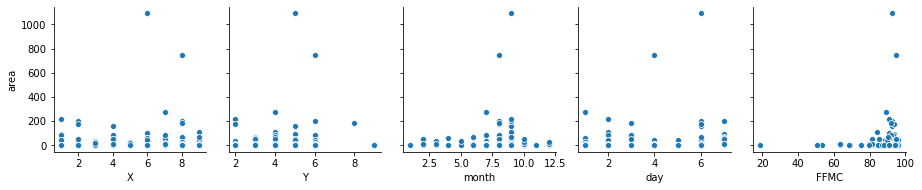

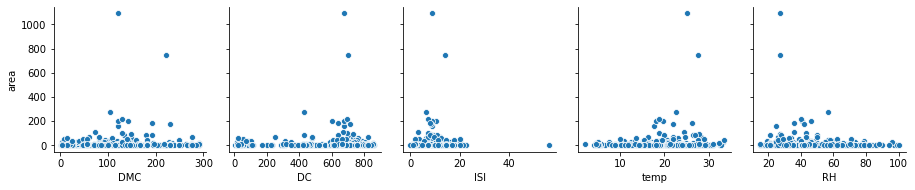

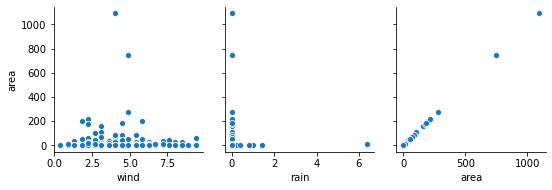

In [13]:
df=fires_all_numeric # dla zioru fires_df rysowanie mięsięcy i dni też działam,ale nie są one wyświetlane w dobrej koleności
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[:5])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[5:10])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[10:])

plt.show()

Przez dwie duże obserwacje a area, wykresy nie są czytelne. Usuńmy je



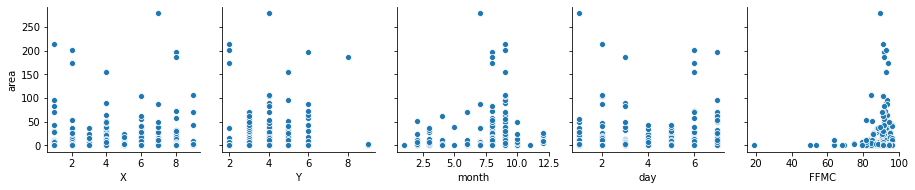

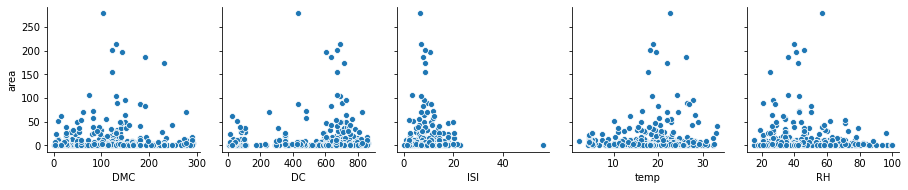

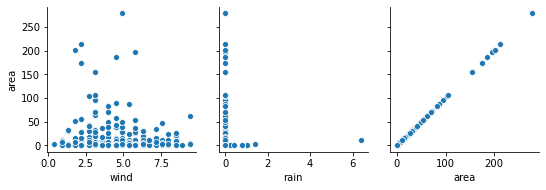

In [14]:
fires_filtered=fires_all_numeric.loc[fires_df['area']<500]
# należy świadomie zaznaczyć ze usuwamy dwa największe obszary pożarów, 
#czyli takie które potencjalnie spowodowały największe szkody, i raczej zależy nam na ich wykrywaniu 
df=fires_filtered
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[:5])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[5:10])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[10:])

plt.show()

Pożary o większym obszarze występują głównie:
w miesiącach nr 8( sierpień) i 9 (wrzesień)
przy wysokim FFMC 
niskim ISI 
niskim RH (wilgotność powietrza)
wysokim DC
przy nikłych opadach 


Można także wyświetlić wykresy par zmiennych 


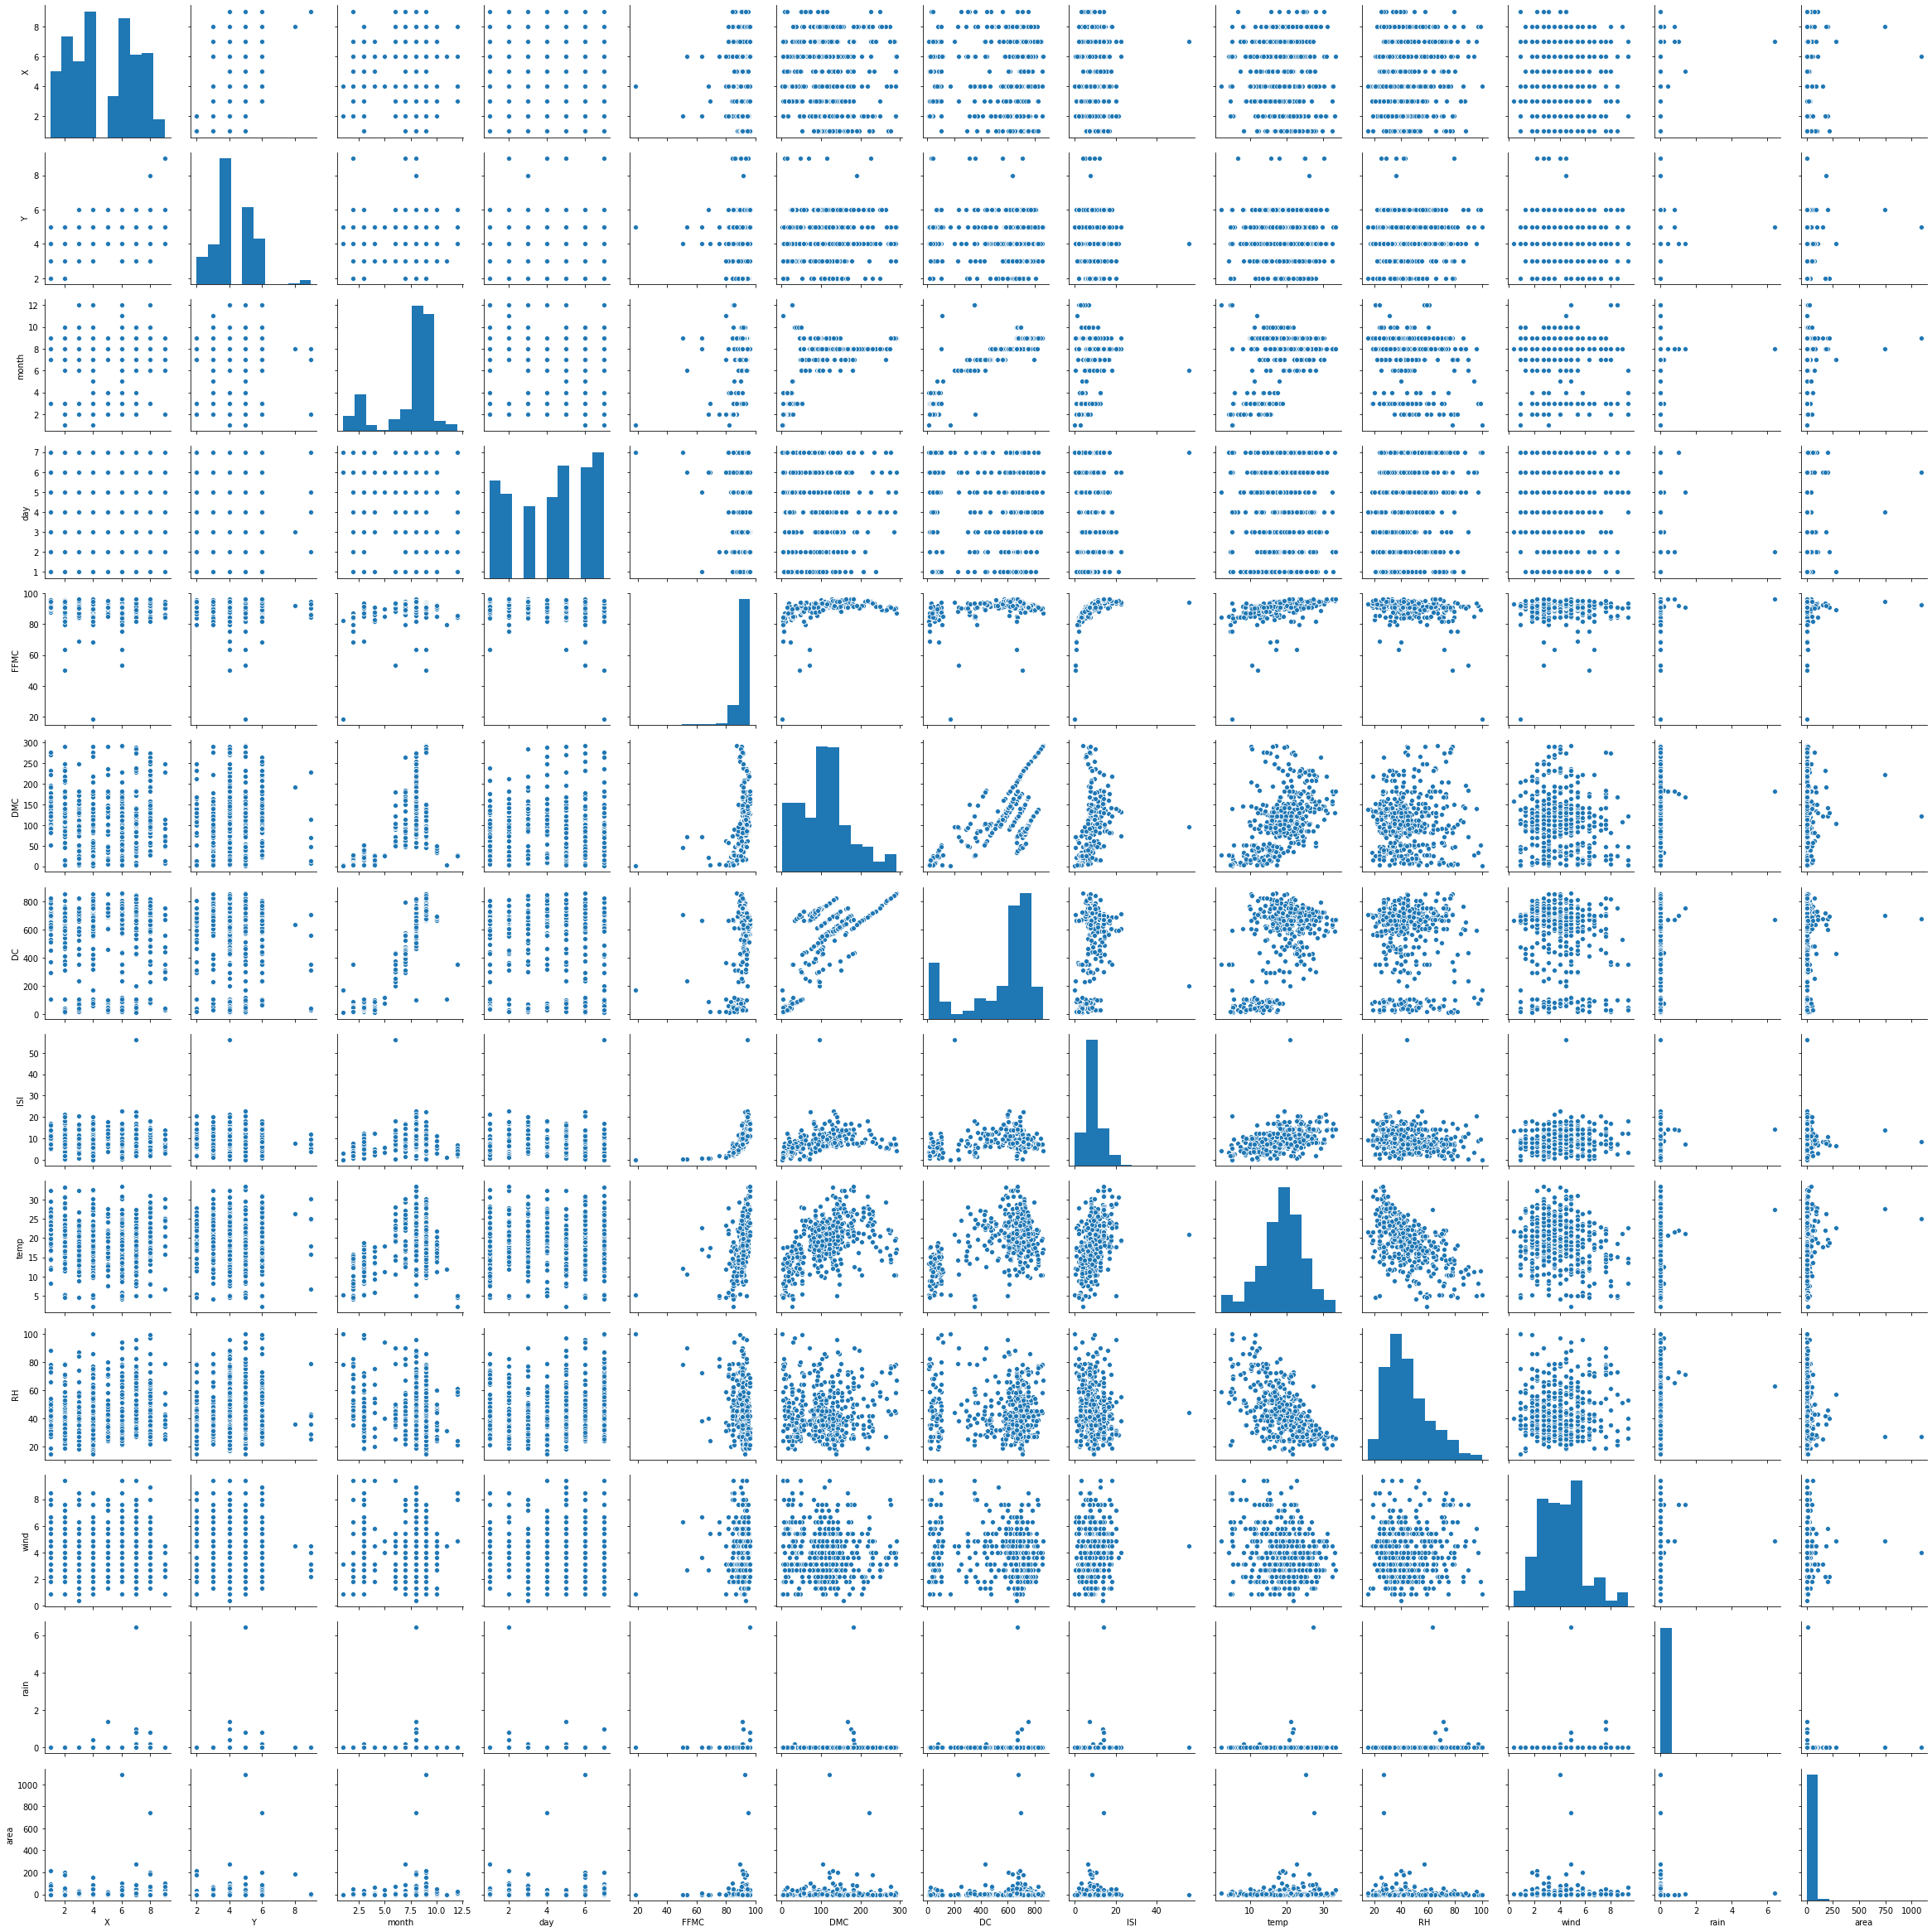

In [15]:
sns.pairplot(fires_all_numeric)
plt.tight_layout()

Przez ilość wykresów i ich rozmiar macierz jest mało czytelna, spójrzmy na heatmape korelacji zmiennych 

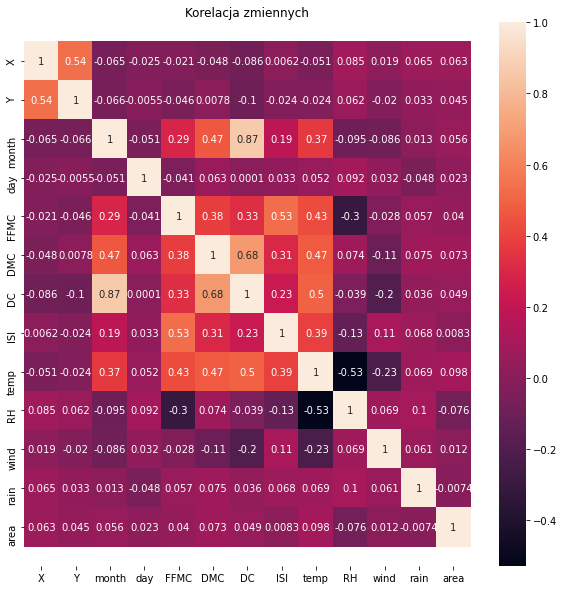

In [16]:
corr=fires_all_numeric.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)

# below is a workaround for matrix truncation
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()


Poparzmy na pary zmiennych o wyliczonym współczynniku korelacji miększym od 0.5 (lub mniejszym od -0.5) <br>
month:DC <br>
DMC:DC <br>
FFMC:ISI <br>
temp:RH <br>
Y:X - pomijamy (bo są  współrzędnymi)

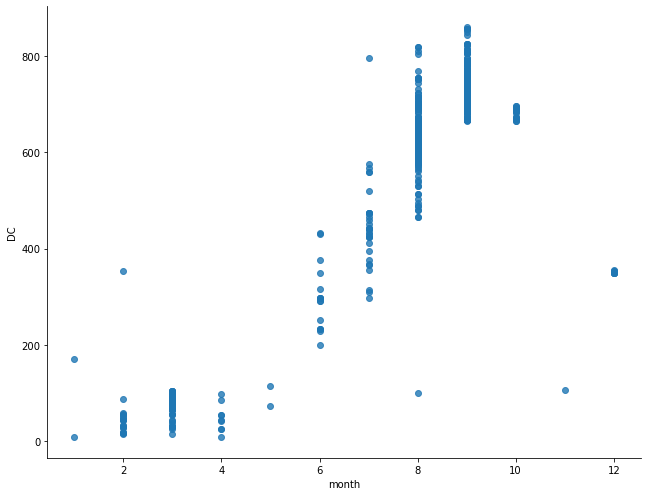

In [17]:
sns.lmplot( y='DC', x='month', data=fires_all_numeric, height=7, aspect=1.3,fit_reg=False)
# miesiące są cykliczne wiec linia regresji średnio ma tu sens 
plt.show()

W miesiącach letnich w głębokich warstwach gleby znajduje sie mało wilgosci (ekstremalna Szusza to DC w okolicach 800)

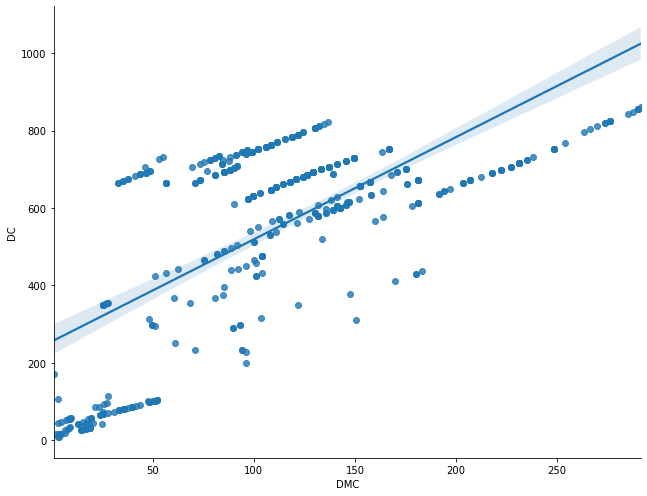

In [18]:
sns.lmplot( x='DMC', y='DC', data=fires_all_numeric, height=7, aspect=1.3)

plt.show()

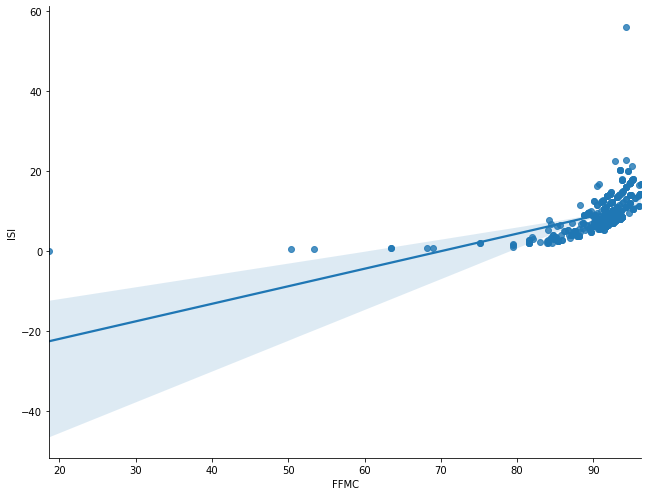

In [19]:
sns.lmplot( x='FFMC', y='ISI', data=fires_all_numeric, height=7, aspect=1.3)

plt.show()

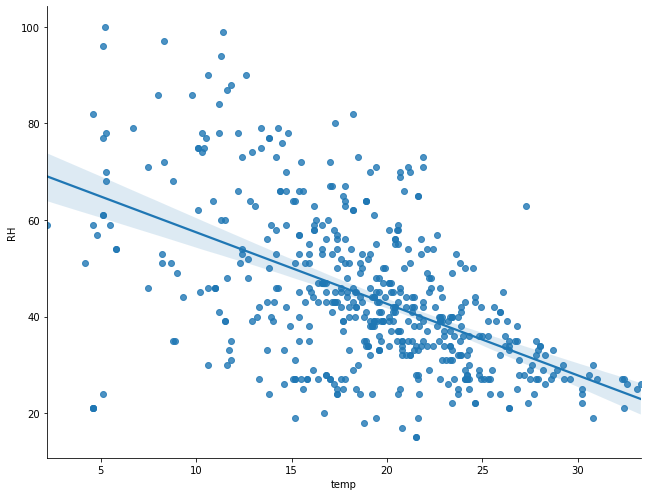

In [20]:
sns.lmplot( x='temp', y='RH', data=fires_all_numeric, height=7, aspect=1.3)

plt.show()

Im wyższa temperatura powierza tym mniejsza wilgotność względna 

## pandas-profiling

In [21]:
from pandas_profiling import ProfileReport
prof = ProfileReport(fires_df)
prof.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas-profiling jest fajnym narzędziem do początkowego zapoznania się z danymi. Jednak nie zrzutuje nam danych kategorycznych na numeryczne, przez co nie można generować par wykresów.  Podoba mi zebranie kilku różnych klasyfikacji kooperacji w jednym miejscu. Generator również nie odfiltrowuje obserwacji odstających przez co wygenerowane wykresy mogą być trudne do przeanalizowania.

## źrudła 
dane: https://www.apispreadsheets.com/datasets/129 <br>
opisy FWI: https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system